# Linear Regression using normal method (one shot)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Loading Data...
First 10 examples from the dataset: 
x = [2104    3], y = 399900
x = [1600    3], y = 329900
x = [2400    3], y = 369000
x = [1416    2], y = 232000
x = [3000    4], y = 539900
x = [1985    4], y = 299900
x = [1534    3], y = 314900
x = [1427    3], y = 198999
x = [1380    3], y = 212000
x = [1494    3], y = 242500
Normalizing Features ...
Running gradient descent ...
Theta computed from gradient descent : 
[340410.91897274 110308.11337059  -6326.5381075 ]
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent) : 293149.994


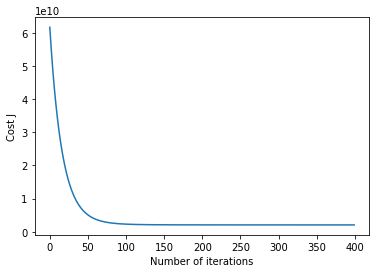

In [13]:
# Data Loader
plt.ion()
print('Loading Data...')
data = np.loadtxt('ex1data2.txt', delimiter=',', dtype=np.int64)
X = data[:, 0:2]
y = data[:, 2]
m = y.size

# Print out some data points
print('First 10 examples from the dataset: ')
for i in range(0, 10):
    print('x = {}, y = {}'.format(X[i], y[i]))

print('Normalizing Features ...')

X, mu, sigma = feature_normalize(X)
X = np.c_[np.ones(m), X]  # Add a column of ones to X

print('Running gradient descent ...')

# Choose some alpha value
alpha = 0.03
num_iters = 400

# Init theta and Run Gradient Descent
theta = np.zeros(3)
theta, J_history = gradient_descent_multi(X, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.figure()
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display gradient descent's result
print('Theta computed from gradient descent : \n{}'.format(theta))

# Estimate the price of a 1650 sq-ft, 3 br house
# ===================== Your Code Here =====================
# Recall that the first column of X is all-ones. Thus, it does
# not need to be normalized.
price = 0  # You should change this
predict = np.array([1650, 3])
predict = (predict - mu) / sigma
predict = np.r_[(1, predict)]
price = np.dot(predict, theta)

# ==========================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent) : {:0.3f}'.format(price))

In [8]:
# Normalize Features

def feature_normalize(X):
    n = X.shape[1]  # the number of features
    X_norm = X
    mu = np.zeros(n)
    sigma = np.zeros(n)
    mu = np.mean(X, 0)
    sigma = np.std(X, 0, ddof=1)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [7]:
# Gradient Descent

def gradient_descent_multi(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)

    for i in range(0, num_iters):
        error = np.dot(X, theta).flatten() - y
        theta -= (alpha / m) * np.sum(X * error[:, np.newaxis], 0)

        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

In [14]:
# Compute Cost

def compute_cost(X, y, theta):
    # Initialize some useful values
    m = y.size
    cost = 0
    cost = np.sum((np.dot(X, theta) - y) ** 2) / (2 * m)

    return cost

In [16]:
# Normal Equation

# Load data
data = np.loadtxt('ex1data2.txt', delimiter=',', dtype=np.int64)
X = data[:, 0:2]
y = data[:, 2]
m = y.size

# Add intercept term to X
X = np.c_[np.ones(m), X]

theta = normal_eqn(X, y)

# Display normal equation's result
print('Theta computed from the normal equations : \n{}'.format(theta))

# Estimate the price of a 1650 sq-ft, 3 br house
price = 0  # You should change this
predict = np.array([1, 1650, 3])
price = np.dot(predict, theta)
print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations) : {:0.3f}'.format(price))

Theta computed from the normal equations : 
[89597.90954361   139.21067402 -8738.01911255]
Predicted price of a 1650 sq-ft, 3 br house (using normal equations) : 293081.464


In [15]:
# Normal Equation Solver

def normal_eqn(X, y):
    theta = np.zeros((X.shape[1], 1))
    Xt = np.transpose(X)
    theta = np.linalg.pinv(Xt.dot(X)).dot(Xt).dot(y)

    return theta